# Is Natural Philosophy objective?

Intro
natural philosophy is
as a predecessor to the scientific method, we assume a level of objectivity higher than other schools of philosophy
objectivity is defined as

Here we will take Aristotle's work, try to classify it's topics (identify natural philosophy vs not) and determine the overall level of objectivity to try and single it out from other philosohical

In [23]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en import English
import en_core_web_md

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/safiraraharjo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/safiraraharjo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [9]:
from spacy.lang.en.examples import sentences 

In [3]:
df = pd.read_csv('/Users/safiraraharjo/Documents/GitHub/ads-spring2023-project1-safiraharjo/data/philosophy_data.csv')

In [100]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,cleaned
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea...","[new, socrates, leave, usual, haunt, lyceum, s..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...,"[prosecute, king, archon]"
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...,"[athenians, prosecution, indictment, euthyphro]"
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?,[]
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ...","[indict, go, tell, indict]"


In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

NLP cleaning

In [24]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(df['sentence_str']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [ ]:
df['cleaned'] = tokens

We are only using aristotle, so filter

In [32]:
aristotle = df[df.author == 'Aristotle']

In [40]:
# dictionary_aristotle = aristotle['cleaned'].to_dict()

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(aristotle['cleaned'])

In [41]:
id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [id2word.doc2bow(doc) for doc in aristotle['cleaned']]
#https://tedboy.github.io/nlps/generated/generated/gensim.corpora.Dictionary.filter_extremes.html

In [ ]:
topics = []
score = []
for i in range(1,26,1):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=aristotle['cleaned'], dictionary=id2word, coherence='u_mass')
    topics.append(i)
    score.append(coherence_model_lda.get_coherence())
    
#https://www.baeldung.com/cs/topic-modeling-coherence-score

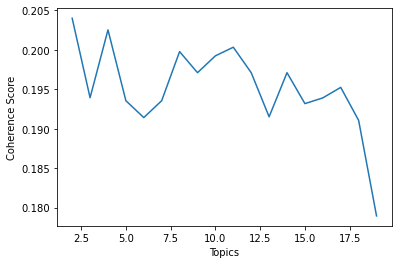

In [59]:
plt.figure()
plt.plot(topics, score)
plt.xlabel('Topics')
plt.ylabel('Coherence Score')
plt.show()

In [ ]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"animal" + 0.026*"man" + 0.022*"change" + 0.022*"thing" + '
  '0.018*"life" + 0.016*"exist" + 0.016*"body" + 0.016*"heat" + 0.016*"cold" + '
  '0.014*"plant"'),
 (1,
  '0.024*"case" + 0.020*"number" + 0.019*"man" + 0.017*"right" + 0.014*"body" '
  '+ 0.011*"different" + 0.011*"line" + 0.010*"reason" + 0.009*"form" + '
  '0.009*"animal"'),
 (2,
  '0.032*"man" + 0.029*"good" + 0.026*"thing" + 0.019*"sense" + 0.014*"white" '
  '+ 0.013*"principle" + 0.012*"line" + 0.012*"case" + 0.011*"clear" + '
  '0.011*"well"'),
 (3,
  '0.019*"man" + 0.013*"law" + 0.013*"case" + 0.012*"great" + 0.011*"bird" + '
  '0.011*"fish" + 0.010*"happen" + 0.010*"action" + 0.010*"end" + '
  '0.010*"office"'),
 (4,
  '0.039*"good" + 0.024*"man" + 0.018*"thing" + 0.018*"animal" + 0.017*"water" '
  '+ 0.013*"great" + 0.012*"place" + 0.010*"reason" + 0.009*"take" + '
  '0.009*"case"'),
 (5,
  '0.047*"thing" + 0.019*"excellence" + 0.017*"come" + 0.014*"cause" + '
  '0.011*"man" + 0.011*"good" + 0.011*"fe

In [129]:
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)
topic_id_list = all_topics_df.idxmax(axis=1)

In [130]:
aristotle['topics'] = topic_id_list

/var/folders/p0/64bf77rj6sxbwv0p9jxt77pw0000gn/T/ipykernel_26376/1330383175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aristotle['topics'] = topic_id_list


In [133]:
!pip install textblob
from textblob import TextBlob

     |████████████████████████████████| 636 kB 7.8 MB/s eta 0:00:01


In [137]:
subj = []
#list to string

for i in range(len(aristotle)):
    item = TextBlob(aristotle.iloc[i, 3]).subjectivity
    subj.append(item)
    
aristotle['subjectivity'] = subj

/var/folders/p0/64bf77rj6sxbwv0p9jxt77pw0000gn/T/ipykernel_26376/3199333076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aristotle['subjectivity'] = subj


In [138]:
aristotle.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,cleaned,topics,subjectivity
38366,Aristotle - Complete Works,Aristotle,aristotle,When things have only a name in common and th...,When things have only a name in common and th...,-320,1991,139,when things have only a name in common and th...,"['when', 'things', 'have', 'only', 'name', 'in...",when thing have only a name in common and t...,"[thing, common, definition, correspond, differ...",8.0,0.7000
38367,Aristotle - Complete Works,Aristotle,aristotle,"Thus, for example, both a man and a picture ar...","Thus, for example, both a man and a picture ar...",-320,1991,56,"thus, for example, both a man and a picture ar...","['thus', 'for', 'example', 'both', 'man', 'and...","thus , for example , both a man and a picture...","[example, man, picture, animal]",4.0,0.0000
38368,Aristotle - Complete Works,Aristotle,aristotle,These have only a name in common and the defin...,These have only a name in common and the defin...,-320,1991,207,these have only a name in common and the defin...,"['these', 'have', 'only', 'name', 'in', 'commo...",these have only a name in common and the defi...,"[common, definition, correspond, different, an...",9.0,0.6000
38369,Aristotle - Complete Works,Aristotle,aristotle,When things have the name in common and the de...,When things have the name in common and the de...,-320,1991,134,when things have the name in common and the de...,"['when', 'things', 'have', 'the', 'name', 'in'...",when thing have the name in common and the de...,"[thing, common, definition, correspond, call, ...",9.0,0.3125
38370,Aristotle - Complete Works,Aristotle,aristotle,"Thus, for example, both a man and an ox are an...","Thus, for example, both a man and an ox are an...",-320,1991,52,"thus, for example, both a man and an ox are an...","['thus', 'for', 'example', 'both', 'man', 'and...","thus , for example , both a man and an ox be ...","[example, man, ox, animal]",9.0,0.0000


In [ ]:
https://levelup.gitconnected.com/simple-nlp-in-python-2cb3243239d3